<a href="https://colab.research.google.com/github/tanvijain13/KDM_2021/blob/main/ICP1/ICP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import all the libraries 
import nltk
nltk.download('punkt')
import pandas as pd
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Next we will mount our google drive on the colab 
run the code below and follow the instructions the G drive will be mounted on drive -> MyDrive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Readind the files as a pandas dataframe 

In [3]:
dataset=pd.read_csv("/content/drive/MyDrive/input_file.txt",delimiter="\t")
dataset

,"Text Analytics has lots of applications in today's online world. By analyzing tweets on Twitter, we can find trending news and peoples reaction on a particular event. Amazon can understand user feedback or review on the specific product. BookMyShow can discover people's opinion about the movie. Youtube can also analyze and understand peoples viewpoints on a video."


converting the data frame to text

In [4]:
text= dataset.to_string()
text

"Empty DataFrame\nColumns: [Text Analytics has lots of applications in today's online world. By analyzing tweets on Twitter, we can find trending news and peoples reaction on a particular event. Amazon can understand user feedback or review on the specific product. BookMyShow can discover people's opinion about the movie. Youtube can also analyze and understand peoples viewpoints on a video.]\nIndex: []"

Pre-processing


In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
import re
from nltk.stem.snowball import SnowballStemmer



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
text

"Empty DataFrame\nColumns: [Text Analytics has lots of applications in today's online world. By analyzing tweets on Twitter, we can find trending news and peoples reaction on a particular event. Amazon can understand user feedback or review on the specific product. BookMyShow can discover people's opinion about the movie. Youtube can also analyze and understand peoples viewpoints on a video.]\nIndex: []"

## Task 1 : Removing stopwords 

In [7]:
## Convert words to lower case and split them
text = text.lower().split()    
## Remove stop words
stops = set(stopwords.words("english"))
text = [w for w in text if not w in stops]
text = " ".join(text)
text

"empty dataframe columns: [text analytics lots applications today's online world. analyzing tweets twitter, find trending news peoples reaction particular event. amazon understand user feedback review specific product. bookmyshow discover people's opinion movie. youtube also analyze understand peoples viewpoints video.] index: []"

## Task 2 : Removing punctuation and special characters 


In [8]:
## Clean the text
text = re.sub("[^a-zA-Z0-9\n]", " ", text) # removing special characters      
text = re.sub("[.!#?]"," ", text)        
text = re.sub("\s+"," ", text) # replace multiple spaces with single space
text

'empty dataframe columns text analytics lots applications today s online world analyzing tweets twitter find trending news peoples reaction particular event amazon understand user feedback review specific product bookmyshow discover people s opinion movie youtube also analyze understand peoples viewpoints video index '

## Task 3: Generating Wordcloud


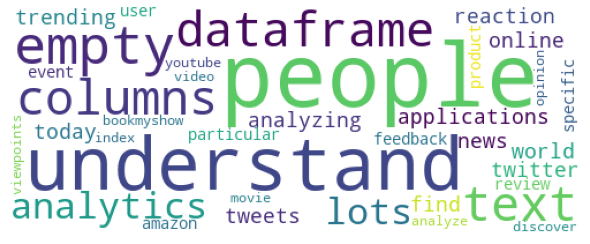

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import pandas as pd   
wordcloud = WordCloud(width = 500, height = 200, 
                background_color ='white', 
                min_font_size = 10).generate(text) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()
      

Breaking the text into sentences 

In [10]:
tokenized_text = sent_tokenize(text)
print(tokenized_text)

['empty dataframe columns text analytics lots applications today s online world analyzing tweets twitter find trending news peoples reaction particular event amazon understand user feedback review specific product bookmyshow discover people s opinion movie youtube also analyze understand peoples viewpoints video index']


Breaking the text into words 

In [11]:
tokenized_word=word_tokenize(text)
print(tokenized_word)
print(len(tokenized_word))

['empty', 'dataframe', 'columns', 'text', 'analytics', 'lots', 'applications', 'today', 's', 'online', 'world', 'analyzing', 'tweets', 'twitter', 'find', 'trending', 'news', 'peoples', 'reaction', 'particular', 'event', 'amazon', 'understand', 'user', 'feedback', 'review', 'specific', 'product', 'bookmyshow', 'discover', 'people', 's', 'opinion', 'movie', 'youtube', 'also', 'analyze', 'understand', 'peoples', 'viewpoints', 'video', 'index']
42


finding the frequencies distribution

In [12]:
fdist = FreqDist(tokenized_word)
print(fdist)


<FreqDist with 39 samples and 42 outcomes>


Finding the two most common words  

In [14]:
fdist.most_common(2)

[('s', 2), ('peoples', 2)]

Plot of the frequencies distribution

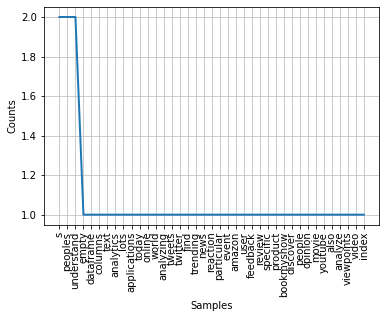

In [15]:
v=fdist.plot(75,cumulative=False)
plt.show()